In [1]:
#Importamos las  librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn import  metrics
from sklearn.metrics import accuracy_score

### Paso 1: Leemos el Dataset

In [2]:
dataset_estadisticas_definitivo = pd.read_csv(r"https://raw.githubusercontent.com/PabloLedo97/Datasets-Master-Big-Data/main/DatasetDefinitivo_Pablo_Ledo.csv",sep=";",encoding='latin-1');
dataset_estadisticas_definitivo

,Equipo,Local/Visitante,Goles_Locales,Suma_Goles_Locales_Acumulados,Media_Goles_Locales,Goles_Visitantes,Suma_Goles_Visitantes_Acumulados,Media_Goles_Visitantes,Puntos_Locales,Media_Puntos_Locales,Puntos_Locales_Acumulados,Puntos_Visitantes,Media_Puntos_Visitantes,Puntos_Visitantes_Acumulados,Resultados,Fecha,Temporada
0,Málaga,Local,0,0,"1,37",0,0,0,1,"1,58",1,0,0,0,x,21/08/2015,2015/2016
1,Sevilla,Visitante,0,0,0,0,0,"0,68",0,0,0,1,"0,47",1,x,21/08/2015,2015/2016
2,Atlético,Local,1,1,"1,74",0,0,0,3,"2,53",3,0,0,0,1,22/08/2015,2015/2016
3,Las Palmas,Visitante,0,0,0,0,0,"1,05",0,0,0,0,"0,79",0,1,22/08/2015,2015/2016
4,Espanyol,Local,1,1,"1,16",0,0,0,3,"1,68",3,0,0,0,1,22/08/2015,2015/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,Villarreal,Visitante,0,0,0,2,20,"1,21",0,0,0,3,"1,21",23,2,22/05/2022,2021/2022
5316,R. Sociedad,Local,1,16,"0,84",0,0,0,0,"1,84",33,0,0,0,2,22/05/2022,2021/2022
5317,Atlético,Visitante,0,0,0,2,32,"1,68",0,0,0,3,"1,58",30,2,22/05/2022,2021/2022
5318,Sevilla,Local,1,36,"1,89",0,0,0,3,"2,21",40,0,0,0,1,22/05/2022,2021/2022


### Paso 2: Definimos  la matriz de entrenamiento y el conjunto de prueba

In [3]:
#Definimos las columnas del dataset que van a participar en la matriz
#Generamos la matriz
matriz =dataset_estadisticas_definitivo.drop(columns=['Resultados','Fecha','Equipo','Local/Visitante','Temporada','Media_Goles_Locales','Media_Goles_Visitantes','Media_Puntos_Locales','Media_Puntos_Visitantes'])


#Generamos el vector con el conjunto de datos que queremos predecir
vector = dataset_estadisticas_definitivo.Resultados.tolist()

### Paso 3: División de los datos en conjunto de entrenamiento y test

In [4]:
#Conjunto de entrenamiento
X_train = matriz
y_train = vector

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size= 0.2,random_state = 123)

### Paso 4:  Definición Modelo

In [5]:
modelo = CatBoostClassifier(iterations=1000,learning_rate=1,depth=2)

### Paso 5:  Entrenamiento del Modelo

In [6]:
modelo.fit(X_train, y_train)

0:	learn: 0.7098990	total: 142ms	remaining: 2m 21s
1:	learn: 0.4040191	total: 144ms	remaining: 1m 11s
2:	learn: 0.2098573	total: 146ms	remaining: 48.4s
3:	learn: 0.1488666	total: 147ms	remaining: 36.7s
4:	learn: 0.0800449	total: 149ms	remaining: 29.6s
5:	learn: 0.0652500	total: 151ms	remaining: 24.9s
6:	learn: 0.0482364	total: 152ms	remaining: 21.6s
7:	learn: 0.0395904	total: 153ms	remaining: 19s
8:	learn: 0.0322949	total: 155ms	remaining: 17s
9:	learn: 0.0309736	total: 156ms	remaining: 15.5s
10:	learn: 0.0260018	total: 157ms	remaining: 14.2s
11:	learn: 0.0218555	total: 159ms	remaining: 13.1s
12:	learn: 0.0192611	total: 160ms	remaining: 12.2s
13:	learn: 0.0173970	total: 162ms	remaining: 11.4s
14:	learn: 0.0167704	total: 163ms	remaining: 10.7s
15:	learn: 0.0153448	total: 164ms	remaining: 10.1s
16:	learn: 0.0145083	total: 166ms	remaining: 9.59s
17:	learn: 0.0138196	total: 167ms	remaining: 9.12s
18:	learn: 0.0133026	total: 169ms	remaining: 8.7s
19:	learn: 0.0131511	total: 170ms	remaining:

258:	learn: 0.0101091	total: 487ms	remaining: 1.39s
259:	learn: 0.0101091	total: 489ms	remaining: 1.39s
260:	learn: 0.0101090	total: 490ms	remaining: 1.39s
261:	learn: 0.0101089	total: 491ms	remaining: 1.38s
262:	learn: 0.0101089	total: 492ms	remaining: 1.38s
263:	learn: 0.0101089	total: 494ms	remaining: 1.38s
264:	learn: 0.0101088	total: 495ms	remaining: 1.37s
265:	learn: 0.0101088	total: 496ms	remaining: 1.37s
266:	learn: 0.0101079	total: 497ms	remaining: 1.36s
267:	learn: 0.0101051	total: 499ms	remaining: 1.36s
268:	learn: 0.0101050	total: 500ms	remaining: 1.36s
269:	learn: 0.0101050	total: 501ms	remaining: 1.35s
270:	learn: 0.0101049	total: 502ms	remaining: 1.35s
271:	learn: 0.0101049	total: 504ms	remaining: 1.35s
272:	learn: 0.0101022	total: 505ms	remaining: 1.34s
273:	learn: 0.0100985	total: 506ms	remaining: 1.34s
274:	learn: 0.0100984	total: 507ms	remaining: 1.34s
275:	learn: 0.0100983	total: 509ms	remaining: 1.33s
276:	learn: 0.0100983	total: 510ms	remaining: 1.33s
277:	learn: 

545:	learn: 0.0100060	total: 837ms	remaining: 696ms
546:	learn: 0.0100060	total: 838ms	remaining: 694ms
547:	learn: 0.0100060	total: 839ms	remaining: 692ms
548:	learn: 0.0100060	total: 841ms	remaining: 691ms
549:	learn: 0.0100060	total: 842ms	remaining: 689ms
550:	learn: 0.0100060	total: 843ms	remaining: 687ms
551:	learn: 0.0100060	total: 844ms	remaining: 685ms
552:	learn: 0.0100060	total: 846ms	remaining: 684ms
553:	learn: 0.0100060	total: 847ms	remaining: 682ms
554:	learn: 0.0100059	total: 848ms	remaining: 680ms
555:	learn: 0.0100059	total: 849ms	remaining: 678ms
556:	learn: 0.0100059	total: 851ms	remaining: 677ms
557:	learn: 0.0100059	total: 852ms	remaining: 675ms
558:	learn: 0.0100059	total: 853ms	remaining: 673ms
559:	learn: 0.0100059	total: 854ms	remaining: 671ms
560:	learn: 0.0100059	total: 856ms	remaining: 669ms
561:	learn: 0.0100059	total: 857ms	remaining: 668ms
562:	learn: 0.0100059	total: 858ms	remaining: 666ms
563:	learn: 0.0100059	total: 859ms	remaining: 664ms
564:	learn: 

819:	learn: 0.0099769	total: 1.18s	remaining: 260ms
820:	learn: 0.0099769	total: 1.18s	remaining: 258ms
821:	learn: 0.0099769	total: 1.19s	remaining: 257ms
822:	learn: 0.0099769	total: 1.19s	remaining: 255ms
823:	learn: 0.0099769	total: 1.19s	remaining: 254ms
824:	learn: 0.0099769	total: 1.19s	remaining: 252ms
825:	learn: 0.0099769	total: 1.19s	remaining: 251ms
826:	learn: 0.0099769	total: 1.19s	remaining: 249ms
827:	learn: 0.0099769	total: 1.19s	remaining: 248ms
828:	learn: 0.0099768	total: 1.19s	remaining: 246ms
829:	learn: 0.0099768	total: 1.2s	remaining: 245ms
830:	learn: 0.0099768	total: 1.2s	remaining: 243ms
831:	learn: 0.0099768	total: 1.2s	remaining: 242ms
832:	learn: 0.0099768	total: 1.2s	remaining: 240ms
833:	learn: 0.0099768	total: 1.2s	remaining: 239ms
834:	learn: 0.0099768	total: 1.2s	remaining: 237ms
835:	learn: 0.0099768	total: 1.2s	remaining: 236ms
836:	learn: 0.0099761	total: 1.2s	remaining: 235ms
837:	learn: 0.0099760	total: 1.21s	remaining: 233ms
838:	learn: 0.009976

### Paso 6: Realizamos la predicción

In [7]:
predicciones = modelo.predict(X_test)
predicciones

array([['1'],
       ['1'],
       ['x'],
       ...,
       ['1'],
       ['x'],
       ['1']], dtype=object)

### Paso 7: Evaluación modelo

#### Cálculo accuracy

In [8]:
accuracy = accuracy_score(y_true= y_test,y_pred= predicciones,normalize = True)
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 99.62406015037594 %


#### Cálculo Matriz de Confusión

[[502   0   0]
 [  4 299   0]
 [  0   0 259]]


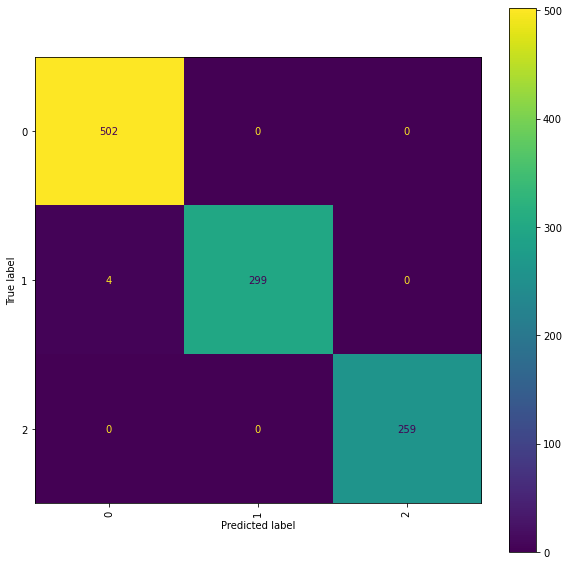

In [9]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

display = ConfusionMatrixDisplay.from_predictions(y_test,predicciones,display_labels = modelo.classes_,colorbar = False,cmap = 'Greens')


#### Clasification Report

In [10]:
from sklearn.metrics import classification_report

reporte_clasificacion = classification_report(y_test, predicciones)

print(reporte_clasificacion)

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       502
           2       1.00      0.99      0.99       303
           x       1.00      1.00      1.00       259

    accuracy                           1.00      1064
   macro avg       1.00      1.00      1.00      1064
weighted avg       1.00      1.00      1.00      1064

